In [15]:

#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [16]:
# Load & Combine Datasets
file1 = "/users/ashutosh/python-venv/plant_disease_dataset.csv"
file2 = "/users/ashutosh/python-venv/plant_disease_data.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print(df1.head())
print(df2.head())

   temperature   humidity   rainfall   soil_pH  disease_present
0    27.483571  33.215053   0.572758  4.975875                1
1    24.308678  36.945005  42.522346  8.165266                0
2    28.238443  34.026189  16.095303  6.316734                1
3    32.615149  41.104180  20.311015  6.164949                0
4    23.829233  51.971785  11.851323  8.482468                0
     Plant_ID Plant_Type Leaf_Color  Leaf_Spot_Size  Humidity  Temperature  \
0  PLANT_0001       Corn      Brown            3.80     69.49        30.68   
1  PLANT_0002     Potato      Brown            6.96     45.72        34.57   
2  PLANT_0003       Corn     Yellow            3.08     86.21        29.29   
3  PLANT_0004       Rice     Yellow            0.50     87.46        16.71   
4  PLANT_0005       Rice      Green            1.58     43.38        26.23   

     Disease_Status  
0    Mild Infection  
1    Mild Infection  
2           Healthy  
3           Healthy  
4  Severe Infection  


In [17]:

df = pd.concat([df1, df2], ignore_index=True)

print("Dataset shape after combining:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())

# Correlation (numeric features only)
numeric_cols = ["Leaf_Spot_Size", "Humidity", "Temperature"]
print("\nCorrelation Matrix:")
print(df[numeric_cols].corr())


Dataset shape after combining: (12500, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  float64
 5   Plant_ID         2500 non-null   object 
 6   Plant_Type       2500 non-null   object 
 7   Leaf_Color       2500 non-null   object 
 8   Leaf_Spot_Size   2500 non-null   float64
 9   Humidity         2500 non-null   float64
 10  Temperature      2500 non-null   float64
 11  Disease_Status   2500 non-null   object 
dtypes: float64(8), object(4)
memory usage: 1.1+ MB
None

Summary Stats:
        temperature      humidity      rainfall       soil_pH  \
count  10000.000000  10000.000000  10000.000000  10

/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/1301851128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Plant_Type", palette="Set2", legend=False)


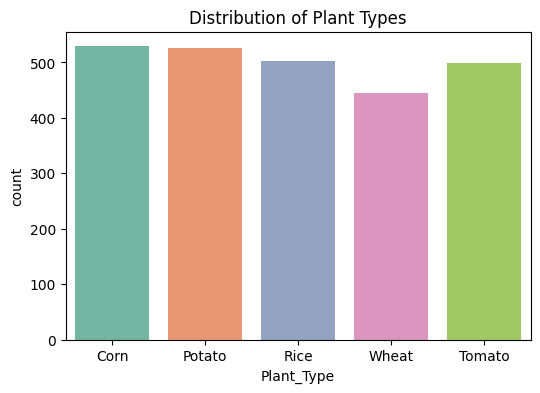

/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/1301851128.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Disease_Status", palette="Set1", legend=False)


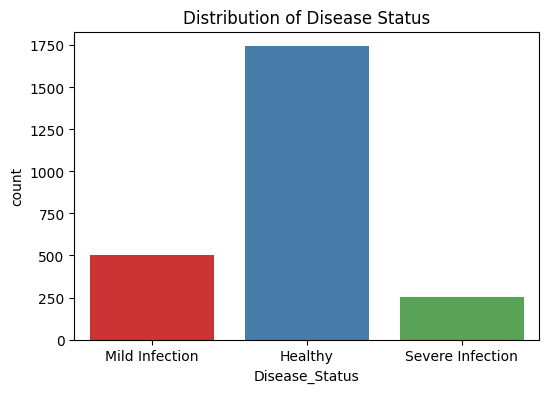

/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/1301851128.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Disease_Status", y=col, palette="coolwarm")


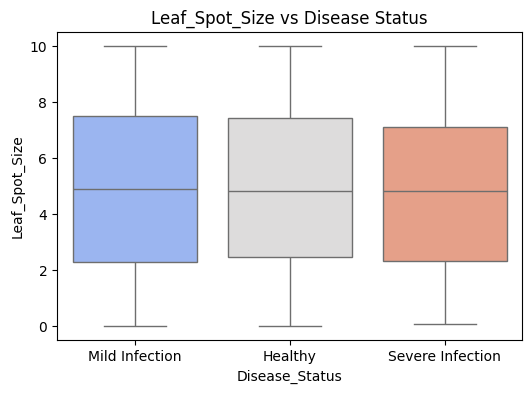

/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/1301851128.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Disease_Status", y=col, palette="coolwarm")


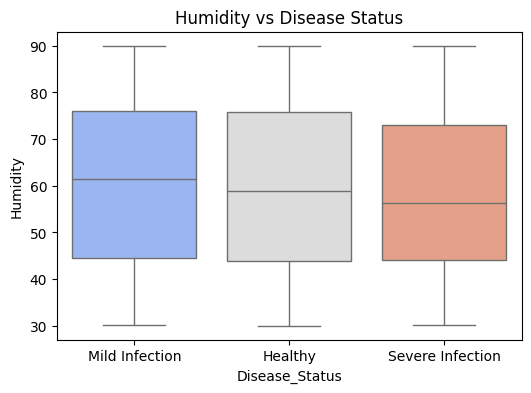

/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/1301851128.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Disease_Status", y=col, palette="coolwarm")


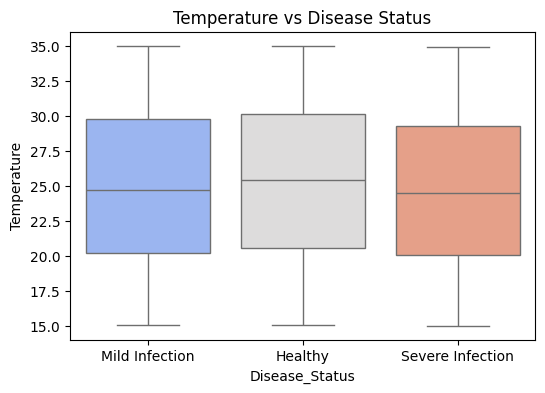

In [18]:
# Exploratory Data Analysis

# Plant Type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Plant_Type", palette="Set2", legend=False)
plt.title("Distribution of Plant Types")
plt.show()

# Disease Status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Disease_Status", palette="Set1", legend=False)
plt.title("Distribution of Disease Status")
plt.show()

# Boxplots
for col in ["Leaf_Spot_Size", "Humidity", "Temperature"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Disease_Status", y=col, palette="coolwarm")
    plt.title(f"{col} vs Disease Status")
    plt.show()


In [19]:
# Encode Categorical Features
le_plant = LabelEncoder()
le_color = LabelEncoder()
le_status = LabelEncoder()

df["Plant_Type"] = le_plant.fit_transform(df["Plant_Type"])
df["Leaf_Color"] = le_color.fit_transform(df["Leaf_Color"])
df["Disease_Status"] = le_status.fit_transform(df["Disease_Status"])


In [20]:
# Train/Test Split
X = df.drop(["Plant_ID", "Disease_Status"], axis=1)
y = df["Disease_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Classification Report:
                   precision    recall  f1-score   support

         Healthy       0.70      0.97      0.81       349
  Mild Infection       0.13      0.02      0.03       100
Severe Infection       0.40      0.04      0.07        51
             nan       1.00      1.00      1.00      2000

        accuracy                           0.94      2500
       macro avg       0.56      0.51      0.48      2500
    weighted avg       0.91      0.94      0.92      2500



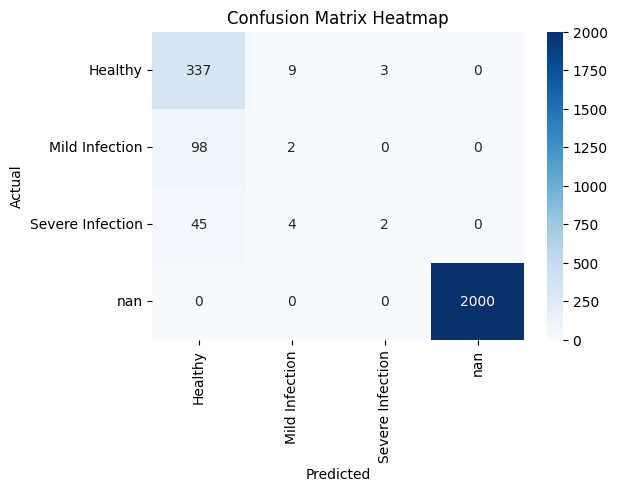

In [22]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Ensure labels present in y_test or y_pred
unique_labels = np.unique(np.concatenate([y_test, y_pred]))

# Convert encoded labels back to original class names
target_names = le_status.inverse_transform(unique_labels)
target_names = [str(name) for name in target_names]   # force to list of strings

# Classification report
print("Classification Report:\n",
      classification_report(y_test, y_pred,
                            labels=unique_labels,
                            target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/1884919453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


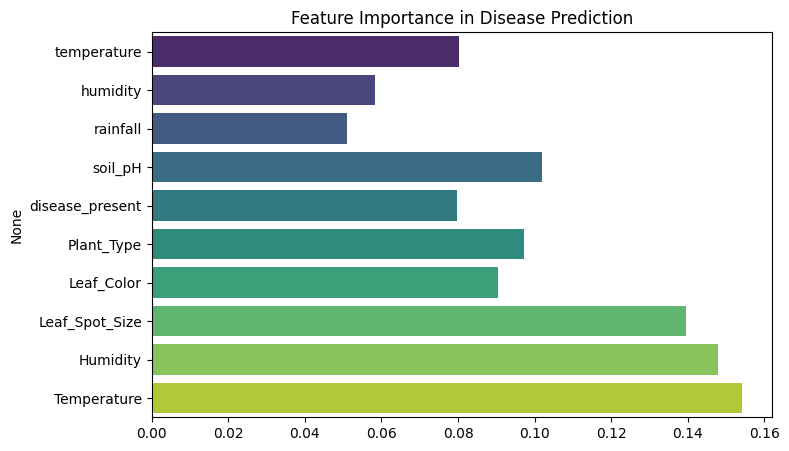

In [23]:
# Feature Importance
plt.figure(figsize=(8,5))
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in Disease Prediction")
plt.show()


In [24]:
# Save Model & Encoders
joblib.dump(model, "plant_disease_model.pkl")
joblib.dump(le_plant, "plant_encoder.pkl")
joblib.dump(le_color, "color_encoder.pkl")
joblib.dump(le_status, "status_encoder.pkl")

print("✅ Model and encoders saved successfully!")


✅ Model and encoders saved successfully!



Feature Importance Scores:
           Feature         Score
6       Leaf_Color  2.019618e+04
5       Plant_Type  1.613458e+04
9      Temperature  6.153639e+00
8         Humidity  2.933165e+00
7   Leaf_Spot_Size  1.315821e+00
3          soil_pH  1.429359e-11
1         humidity  0.000000e+00
2         rainfall  0.000000e+00
4  disease_present -5.177631e-13
0      temperature -1.147802e-11


/var/folders/vn/j3kyb3f14dngz6y0dp2yf5jh0000gn/T/ipykernel_10469/2082474947.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="Feature", data=feature_scores, palette="crest")


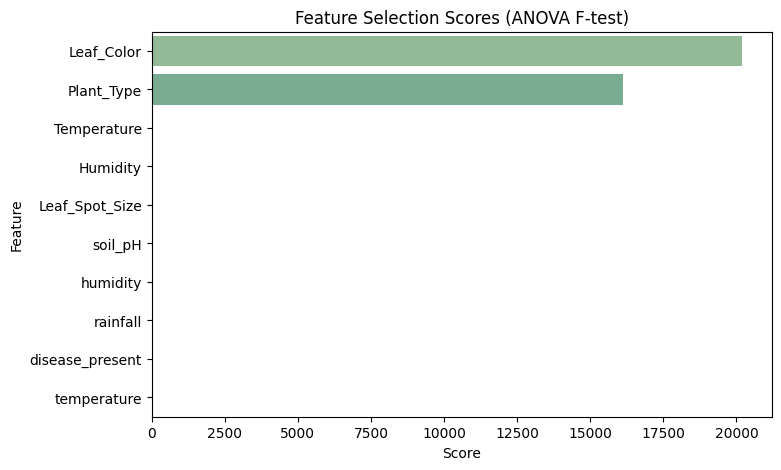

In [25]:
#  Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

X = df.drop(columns=["Plant_ID", "Disease_Status"])
y = df["Disease_Status"]

if y.dtype == "object":
    y = le_status.fit_transform(y)

X_enc = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy="mean")
X_enc = pd.DataFrame(imputer.fit_transform(X_enc), columns=X_enc.columns)


selector = SelectKBest(score_func=f_classif, k="all")
X_new = selector.fit_transform(X_enc, y)


feature_scores = pd.DataFrame({
    "Feature": X_enc.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

print("\nFeature Importance Scores:")
print(feature_scores)


plt.figure(figsize=(8,5))
sns.barplot(x="Score", y="Feature", data=feature_scores, palette="crest")
plt.title("Feature Selection Scores (ANOVA F-test)")
plt.show()


In [26]:
# Cross Validation
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-validation Accuracy Scores: [0.9356 0.9344 0.9364 0.9352 0.9344]
Mean Accuracy: 0.9352


In [27]:
# Multi Sample Predictions
import pandas as pd
import numpy as np

# Raw new samples
new_samples_raw = pd.DataFrame({
    "Plant_Type": ["Corn", "Rice", "Potato"],
    "Leaf_Color": ["Green", "Yellow", "Brown"],
    "Leaf_Spot_Size": [1.2, 4.8, 6.0],
    "Humidity": [65.0, 80.0, 50.0],
    "Temperature": [27.0, 30.0, 35.0]
})

X_train_cols = X_train.columns

new_samples_enc = pd.get_dummies(new_samples_raw, drop_first=True)


for col in X_train_cols:
    if col not in new_samples_enc.columns:
        new_samples_enc[col] = 0


new_samples_enc = new_samples_enc[X_train_cols]

probs = model.predict_proba(new_samples_enc)
predictions = model.predict(new_samples_enc)

for i in range(len(new_samples_enc)):
    print(f"Sample {i+1}: {le_status.inverse_transform([predictions[i]])[0]}")
    for cls, p in zip(le_status.classes_, probs[i]):
        print(f"   {cls}: {p:.2f}")


Sample 1: nan
   Healthy: 0.44
   Mild Infection: 0.02
   Severe Infection: 0.03
   nan: 0.51
Sample 2: nan
   Healthy: 0.27
   Mild Infection: 0.19
   Severe Infection: 0.03
   nan: 0.51
Sample 3: nan
   Healthy: 0.22
   Mild Infection: 0.16
   Severe Infection: 0.11
   nan: 0.51


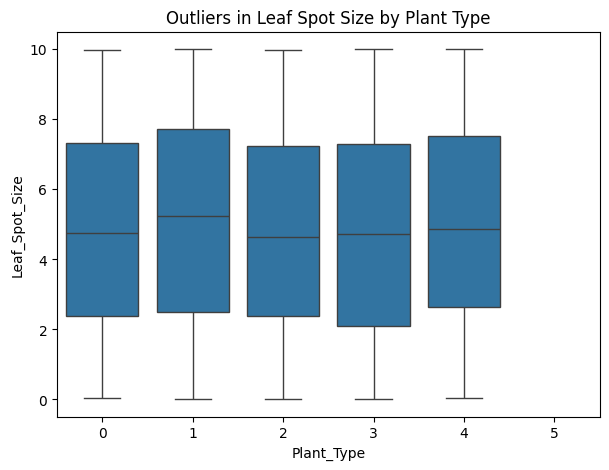

In [28]:
#  Detection
plt.figure(figsize=(7,5))
sns.boxplot(data=df, y="Leaf_Spot_Size", x="Plant_Type")
plt.title("Outliers in Leaf Spot Size by Plant Type")
plt.show()
